<a href="https://colab.research.google.com/github/adilsaid64/Data-Analysis-and-Machine-Learning-Courses/blob/main/Linear_Regression%20Project%201/Linear_Regression_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression With Python

---
The problem:
"ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. You're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer."

- I followed this tutorial: https://youtu.be/CVszSgTWODE
- Tutorial notebook: https://jovian.ai/aakashns/python-sklearn-linear-regression
- The data: https://github.com/stedy/Machine-Learning-with-R-datasets
---
My objective is to learn how to prepare your data for a linear regression, then fit a linear regression model using Python.

How I would approuch the problem:
1. Check the assumptions of a linear regression model, ie, Linearity via scatter plot, Independance of errors by looking at residuals versus fits plot and check that correlation is approx 0, Normality of errors by looking at a histrogram of the residuals and check for a normal distribution, and equal variance by checking residuals vs fitted.
2. Maybe also do some extra data exploration to get a feel for the data
3. Then split the data into training and test data, and fit the linear model. Simple and/or multivariate lm depending on what we see.


##Downloading the Data

In [1]:
data_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(data_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x7fd34edf1750>)

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("medical.csv")

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- We want a way to estimate the charges column based on other columns in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing values in the data set which is good

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- All values seem reasnable, and nothing out of the ordinary. There is some skew looking at the charges however.

##Exploratory Analysis
The aim is to explore the coloumns in the data set, and to visualize the distribution of values, how the relationship between charges and other columns. Also look for other relationships between the indepdent variables

In [7]:
import plotly.express as px#this modules is used to interactive charts
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(10,6)
matplotlib.rcParams["figure.facecolor"]="#00000000"

###Age

In [ ]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(df, 
                   x = "age",
                   marginal = "box",
                   nbins = 47,
                   title = "Distribution of Age")

fig.update_layout(bargap = 0.1)
fig.show()

- We see a somewhat uniform distribution. With exception to customers aged 18 and 19, which have double the number than any other age. 
- We see from the boxplot the midpoint is roughly in the middle, and the quartiles are balanced. 

###BMI

In [ ]:
fig = px.histogram(df, 
                   x = "bmi",
                   marginal = "box",
                   color_discrete_sequence = ["red"],
                   title = "Distribution of BMI")

fig.update_layout(bargap = 0.1)
fig.show()

- BMI seems to follow a normal distribution, with values centered around 30. 

###Charges

In [ ]:
fig = px.histogram(df, 
                   x = "charges",
                   marginal = "box",
                   color = "smoker",
                   color_discrete_sequence=["green", "grey"],
                   title = "Annual Medical Charge")

fig.update_layout(bargap = 0.1)
fig.show()

- Non Smokers less than 10k, and it seems those who responed yes to smoking seem to have a much higher medical expence. 
- Could this mean, smoking increases your medical bill? or do people that smoke take more life insurance than people that dont? At this stage, we dont know.
- All we know, people who responed yes, pay more.
- We see that it looks like an exponential distribution
- Looking at the seperate distriutions, we see that non smokers remains exponential, however smokers have two sections. Why do we see this pattern?

In [ ]:
fig = px.histogram(df, 
                   x = "charges",
                   marginal = "box",
                   color = "sex",
                   color_discrete_sequence=["orchid", "teal"],
                   title = "Annual Medical Charge")

fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(df, 
                   x = "charges",
                   marginal = "box",
                   color = "region",
                   title = "Annual Medical Charge")

fig.update_layout(bargap = 0.1)
fig.show()

###Smoker

In [ ]:
df.smoker.value_counts()/len(df.smoker)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [ ]:
px.histogram(df, x = "smoker", color = "sex", title = "Smoker")

- Around 20% of customers smoke. Is this representative in real world population?
- More males smoke than females. Is this representative of real world?

We have to check if our data matches the distribution of population. Our data shows that 20% of people smoke, however if reality is that 50% of people smoke, our analysis and any model we build will be wrong.

###Age and Charges

In [ ]:
fig = px.scatter(df,
                 x= "age",
                 y = "charges",
                 color = "smoker",
                 opacity = 0.8,
                 hover_data = ["sex"],
                 title = "Age Vs Charges")

fig.update_traces(marker_size = 5)
fig.show()

- We see three clear clusters when looking at smokers and non smokers, each have a sort of have a line with an increasing slope. 
- There is a general linear trend in all clusters.
- If we only look at the non smokers, chart, we see two clusters. A base line, and another line above that. What could be the reason for this? 
- And when only looking at the smokers plots, we see two clusters, a base line, and one above the base line.
- so its clear that age is not the only factor affecting charges, and there are other factors and reasons creating a second more expensive cluster.

###BMI and Charges

In [ ]:
fig = px.scatter(df,
                 x= "bmi",
                 y = "charges",
                 color = "smoker",
                 opacity = 0.8,
                 hover_data = ["sex"],
                 title = "Age Vs Charges")

fig.update_traces(marker_size = 5)
fig.show()

- Looking at non smokers, we dont see any clear pattern between BMI and chargers. High BMI for non smokers doesnt seem to impact the charges, however maybe it could and we dont see because the data sample is not large enough.
- Looking at smokers, we see two clusters. One bellow 30 BMI and one above 30BMI. Medical chargers seem to be much higher when someone is a smoker, and has a high BMI. More investigation is needed.


###Children and Chargers

In [9]:
px.violin(df, x = "children", y = "charges")

- The width tell us how many data points lie around that area.
- As number of children increases, the potential charge increaes slightly. There is a week trend.

##Correlation

Finding Correlation coefficients

In [10]:
df.charges.corr(df.age)

0.2990081933306476

In [12]:
df.charges.corr(df.bmi)

0.19834096883362895

To find correlation coefficients for catogorical columns, we need to convert them to numerical columns. So converting smoker column;

In [22]:
smoker_values = {"no":0, "yes":1}#a dictionary
smoker_numeric = df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [16]:
df.charges.corr(smoker_numeric)

0.787251430498478

In [17]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

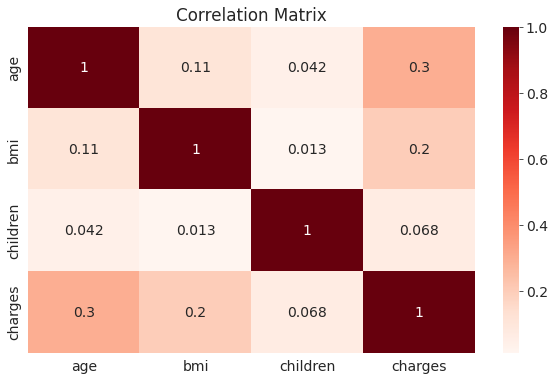

In [23]:
sns.heatmap(df.corr(), cmap = "Reds", annot = True)
plt.title("Correlation Matrix")

A high correlation, doesn't mean causation. X can cause Y or Y could cause X, or both are affected by another factor Z.


- We see a correlation between Age and Charges, and Bmi and Charges. 
- Smoker has the highest correlation with Charges
- Highest correlation in order, Smoker(catagorical), age(numberical), Bmi(Numberical)

##Linear Regression


In [10]:
from sklearn.linear_model import LinearRegression

###Simple Linear Regression

Estimating charges using Age

In [9]:
non_smokers = df[df.smoker == "no"]

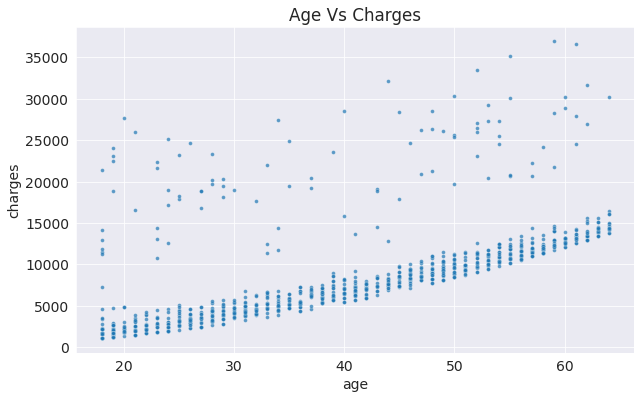

In [27]:
plt.title("Age Vs Charges")
sns.scatterplot(data = non_smokers, x = "age", y = "charges", alpha = 0.7, s = 15)

In [10]:
model = LinearRegression()

In [10]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [11]:
X = non_smokers[["age"]]
y = non_smokers.charges

In [12]:
model.fit(X,y)

LinearRegression()

In [13]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [15]:
#comparing predictions
predictions = model.predict(X)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [11]:
def RMSE(y, y_pred):
      return np.sqrt(np.mean(np.square(y - y_pred)))

In [29]:
RMSE(y, predictions)

4662.505766636395

The model has a root mean squared error of £4662.56, which considering that we had alot of outliers. Maybe the model would be alot better without the outliers.

In [31]:
model.coef_

array([267.24891283])

In [34]:
model.intercept_

-2091.4205565650864

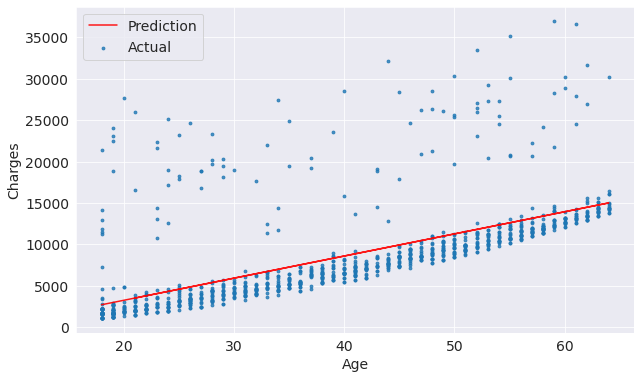

In [36]:
plt.plot(X, predictions, 'r', alpha=0.9);
plt.scatter(X, y, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Prediction', 'Actual']);

We see there are two clusters, the line his slightly above the first cluster, and bellow the second cluster, so we have captured information from both clusters which is good.
Could be intresting to find a model for smokers

###Multiple Linear Regression

Adding multiple feature to the model

####Adding BMI

In [13]:
X = non_smokers[["age", "bmi"]]
y = non_smokers["charges"]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

In [14]:
RMSE(y, predictions)

4662.3128354612945

Adding BMI did not create much of an impact, and this is to be expected, we dont see a huge correlation between BMI and charges, especially with non smokers.

In [15]:
model.coef_

array([266.87657817,   7.07547666])

In [17]:
#looking at the relationship between BMI and non smokers
fig = px.scatter(non_smokers, x ="bmi", y = "charges", title = "BMI vs charges")
fig.update_traces(marker_size = 5)
fig.show()

We see that there is no correlation, which explains the little effect

In [19]:
fig = px.scatter_3d(non_smokers, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

####Adding Children

In [21]:
X = non_smokers[["age", "bmi", "children"]]
y = non_smokers["charges"]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

RMSE(y, predictions)

4608.470405038247

####Working with the complete df

In [31]:
X = df[["age", "bmi", "children"]]
y = df["charges"]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

RMSE(y, predictions)

11355.317901125973

We see a RMSE of 11355l, which is high. Adding in smokers, which we know has a high correlation with charges

####Adding catogorical features

We already encoded smokers into a numberical binary. So first I'll update the data frame

In [29]:
smoker_values = {"no":0, "yes":1}#a dictionary
df["smoker_values"] = df.smoker.map(smoker_values)

In [30]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_values
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [33]:
X = df[["age", "bmi", "children", "smoker_values"]]
y = df["charges"]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

RMSE(y, predictions)

6056.439217188081

By adding smokers, we see that the RMSE is almost halved.

##Questions that come up


1. Why is there around twice as many people at ages 18 and 19 compared with other ages?

2. The age distribution follows sort of follows a uniform distribution. Is this representative of the populaiton as whole? We can look at population data to see this.

3. Why does BMI follow a normal distribution and Age a uniform distribution?

4. Why does the smokers distrinution have two patterns? Could there be two catorogories of smokers? Maybe heavy or light smokers?

5. Would having two seperate models, one for smokers, one for non smokers better than having a single model? and why?

##Summary
- Done some explanotory analysis, and how to use interactive charts
- Learnt how to look at correlation, and convert catogorical data.
- Used Sklearn to create linear regression models, simple and multiple.
- Learnt to create a RMSE function to evaluate the performce of our modes.
- Learnt more ways to ask intresting and critical questions when analysing models and data.